In [1]:
# || Header ||
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
import ipywidgets as widgets
from skimage import measure
import linecache
import math
import sys
sys.path.append('/u/home/k/kimvonga/python/')
import sm_fxns as sm
import dimer_dissoc_analysis as lib
import thf_dissoc_analysis as thf_lib
import plot_dimer_diss as plt_lib
import dimer_cavity as cav_lib
import Na2THF_clusters as ntb_fxns
from importlib import reload
plt.rcParams.update({'font.size': 14})

In [2]:
def genDistr(my_array, spacing=0.1):
    low = int(min(my_array)/spacing)*spacing
    high = math.ceil(max(my_array)/spacing)*spacing
    bins = np.arange(low, high, spacing)
    counts = np.zeros([len(bins),3])
    
    for i in range(len(my_array)):
        counts[int((my_array[i]-low)/spacing),1] += 1
    norm = np.sum(counts[:,1])
    print(norm)
    counts[:,2] = np.sqrt((counts[:,1]/norm)*(1-counts[:,1]/norm)/norm)*1.96
    counts[:,1] /= norm
    counts[:,0] = bins + spacing/2
    
    return counts

In [3]:
my_dir = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/1/'
(t0, t, dt) = (0, 3000, 4)
t_frames = np.arange(t0, t+dt, dt)

coord_num = np.zeros([len(t_frames), 3])
node_angle = np.zeros([len(t_frames), 2])
com_dist = np.zeros([len(t_frames), 2])
mol_geo = np.zeros([len(t_frames), 3])

bond_dist = np.loadtxt(my_dir+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4)]
dipole = np.loadtxt(my_dir+'/out.dip')[int(t0/4):int(t/4+1):int(dt/4),3:6]
for i in range(len(t_frames)):
    r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])

    coord_num[i,1:] = thf_lib.calcCoordNum(r_Na, r_THF, r_cutoff=3.65, kappa=0.2, n_solu=2)
    node_angle[i,1] = thf_lib.calcNodeAngle(r_Na, dipole[i,:])
    # calculating molecular geometry
    coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
    na1_indices = 5*np.array([n for n in coord_indices[0] if n >= 0])
    na2_indices = 5*np.array([n for n in coord_indices[1] if n >= 0])
    mol_geo[i,1] = thf_lib.calcMolGeo(r_Na[0], r_THF[na1_indices])
    mol_geo[i,2] = thf_lib.calcMolGeo(r_Na[1], r_THF[na2_indices])
r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
com_dist[:,1] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])

coord_num[:,0] = t_frames
node_angle[:,0] = t_frames
com_dist[:,0] = t_frames
mol_geo[:,0] = t_frames

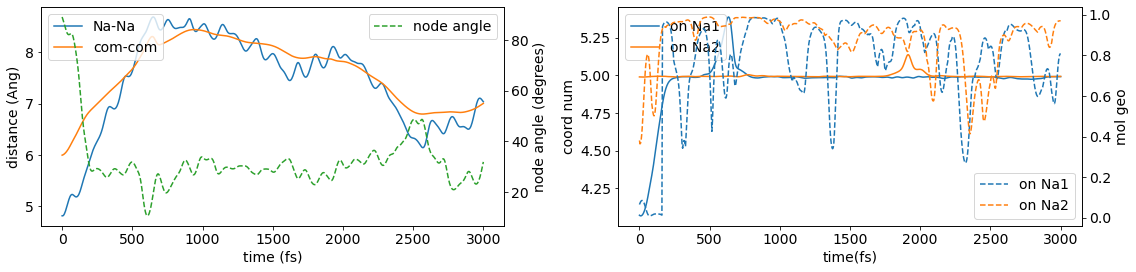

In [4]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(bond_dist[:,0], bond_dist[:,1], label='Na-Na')
plt.plot(com_dist[:,0], com_dist[:,1], label='com-com')
plt.legend(loc=2)
plt.ylabel('distance (Ang)')
#plt.xlim([0,3000])
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(node_angle[:,0], node_angle[:,1], 'C2--', label='node angle')
plt.ylabel('node angle (degrees)')
plt.legend(loc=1)
# plt.ylim([0,90])

plt.subplot(1,2,2)
plt.plot(coord_num[:,0], coord_num[:,1], label='on Na1')
plt.plot(coord_num[:,0], coord_num[:,2], label='on Na2')
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time(fs)')

plt.twinx()
plt.plot(mol_geo[:,0], mol_geo[:,1], 'C0--', label='on Na1')
plt.plot(mol_geo[:,0], mol_geo[:,2], 'C1--', label='on Na2')
plt.legend(loc=4)
plt.ylabel('mol geo')

plt.tight_layout()

In [16]:
my_dir = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/9/'
(t0, t, dt) = (0, 3000, 4)
t_frames = np.arange(t0, t+dt, dt)

coord_num = np.zeros([len(t_frames), 3])
node_angle = np.zeros([len(t_frames), 2])
com_dist = np.zeros([len(t_frames), 2])
mol_geo = np.zeros([len(t_frames), 3])

bond_dist = np.loadtxt(my_dir+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4)]
dipole = np.loadtxt(my_dir+'/out.dip')[int(t0/4):int(t/4+1):int(dt/4),3:6]
for i in range(len(t_frames)):
    r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])

    coord_num[i,1:] = thf_lib.calcCoordNum(r_Na, r_THF, r_cutoff=3.65, kappa=0.2, n_solu=2)
    node_angle[i,1] = thf_lib.calcNodeAngle(r_Na, dipole[i,:])
    # calculating molecular geometry
    coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
    na1_indices = 5*np.array([n for n in coord_indices[0] if n >= 0])
    na2_indices = 5*np.array([n for n in coord_indices[1] if n >= 0])
    mol_geo[i,1] = thf_lib.calcMolGeo(r_Na[0], r_THF[na1_indices])
    mol_geo[i,2] = thf_lib.calcMolGeo(r_Na[1], r_THF[na2_indices])
r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
com_dist[:,1] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])

coord_num[:,0] = t_frames
node_angle[:,0] = t_frames
com_dist[:,0] = t_frames
mol_geo[:,0] = t_frames

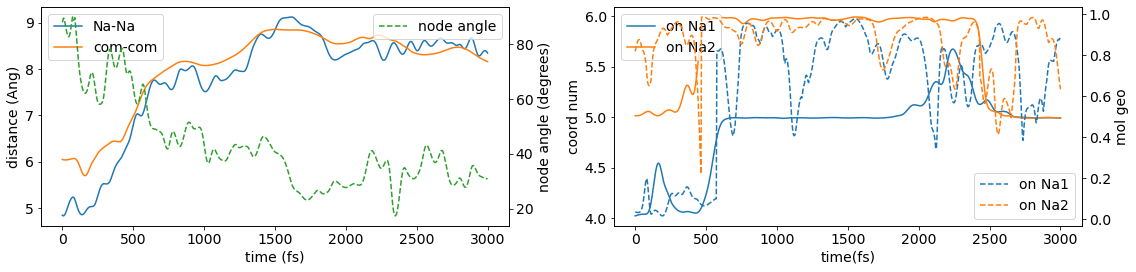

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(bond_dist[:,0], bond_dist[:,1], label='Na-Na')
plt.plot(com_dist[:,0], com_dist[:,1], label='com-com')
plt.legend(loc=2)
plt.ylabel('distance (Ang)')
#plt.xlim([0,3000])
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(node_angle[:,0], node_angle[:,1], 'C2--', label='node angle')
plt.ylabel('node angle (degrees)')
plt.legend(loc=1)
# plt.ylim([0,90])

plt.subplot(1,2,2)
plt.plot(coord_num[:,0], coord_num[:,1], label='on Na1')
plt.plot(coord_num[:,0], coord_num[:,2], label='on Na2')
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time(fs)')

plt.twinx()
plt.plot(mol_geo[:,0], mol_geo[:,1], 'C0--', label='on Na1')
plt.plot(mol_geo[:,0], mol_geo[:,2], 'C1--', label='on Na2')
plt.legend(loc=4)
plt.ylabel('mol geo')

plt.tight_layout()

In [18]:
my_dir = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/16/'
(t0, t, dt) = (0, 3000, 4)
t_frames = np.arange(t0, t+dt, dt)

coord_num = np.zeros([len(t_frames), 3])
node_angle = np.zeros([len(t_frames), 2])
com_dist = np.zeros([len(t_frames), 2])
mol_geo = np.zeros([len(t_frames), 3])

bond_dist = np.loadtxt(my_dir+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4)]
dipole = np.loadtxt(my_dir+'/out.dip')[int(t0/4):int(t/4+1):int(dt/4),3:6]
for i in range(len(t_frames)):
    r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])

    coord_num[i,1:] = thf_lib.calcCoordNum(r_Na, r_THF, r_cutoff=3.65, kappa=0.2, n_solu=2)
    node_angle[i,1] = thf_lib.calcNodeAngle(r_Na, dipole[i,:])
    # calculating molecular geometry
    coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
    na1_indices = 5*np.array([n for n in coord_indices[0] if n >= 0])
    na2_indices = 5*np.array([n for n in coord_indices[1] if n >= 0])
    mol_geo[i,1] = thf_lib.calcMolGeo(r_Na[0], r_THF[na1_indices])
    mol_geo[i,2] = thf_lib.calcMolGeo(r_Na[1], r_THF[na2_indices])
r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
com_dist[:,1] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])

coord_num[:,0] = t_frames
node_angle[:,0] = t_frames
com_dist[:,0] = t_frames
mol_geo[:,0] = t_frames

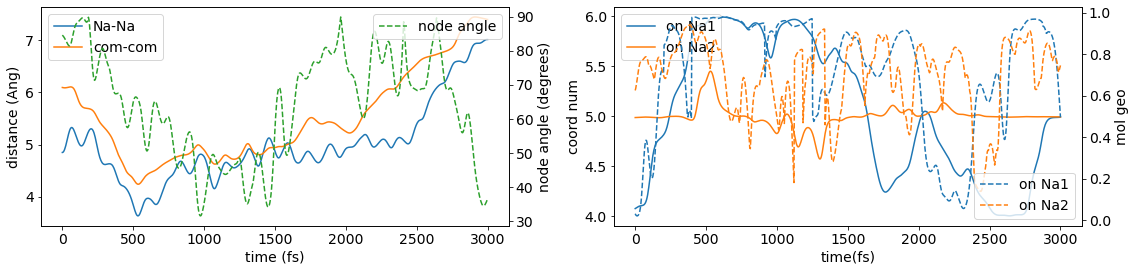

In [19]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(bond_dist[:,0], bond_dist[:,1], label='Na-Na')
plt.plot(com_dist[:,0], com_dist[:,1], label='com-com')
plt.legend(loc=2)
plt.ylabel('distance (Ang)')
#plt.xlim([0,3000])
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(node_angle[:,0], node_angle[:,1], 'C2--', label='node angle')
plt.ylabel('node angle (degrees)')
plt.legend(loc=1)
# plt.ylim([0,90])

plt.subplot(1,2,2)
plt.plot(coord_num[:,0], coord_num[:,1], label='on Na1')
plt.plot(coord_num[:,0], coord_num[:,2], label='on Na2')
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time(fs)')

plt.twinx()
plt.plot(mol_geo[:,0], mol_geo[:,1], 'C0--', label='on Na1')
plt.plot(mol_geo[:,0], mol_geo[:,2], 'C1--', label='on Na2')
plt.legend(loc=4)
plt.ylabel('mol geo')

plt.tight_layout()

In [20]:
my_dir = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/45init/17/'
(t0, t, dt) = (0, 3000, 4)
t_frames = np.arange(t0, t+dt, dt)

coord_num = np.zeros([len(t_frames), 3])
node_angle = np.zeros([len(t_frames), 2])
com_dist = np.zeros([len(t_frames), 2])
mol_geo = np.zeros([len(t_frames), 3])

bond_dist = np.loadtxt(my_dir+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4)]
dipole = np.loadtxt(my_dir+'/out.dip')[int(t0/4):int(t/4+1):int(dt/4),3:6]
for i in range(len(t_frames)):
    r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])

    coord_num[i,1:] = thf_lib.calcCoordNum(r_Na, r_THF, r_cutoff=3.65, kappa=0.2, n_solu=2)
    node_angle[i,1] = thf_lib.calcNodeAngle(r_Na, dipole[i,:])
    # calculating molecular geometry
    coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
    na1_indices = 5*np.array([n for n in coord_indices[0] if n >= 0])
    na2_indices = 5*np.array([n for n in coord_indices[1] if n >= 0])
    mol_geo[i,1] = thf_lib.calcMolGeo(r_Na[0], r_THF[na1_indices])
    mol_geo[i,2] = thf_lib.calcMolGeo(r_Na[1], r_THF[na2_indices])
r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
com_dist[:,1] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])

coord_num[:,0] = t_frames
node_angle[:,0] = t_frames
com_dist[:,0] = t_frames
mol_geo[:,0] = t_frames

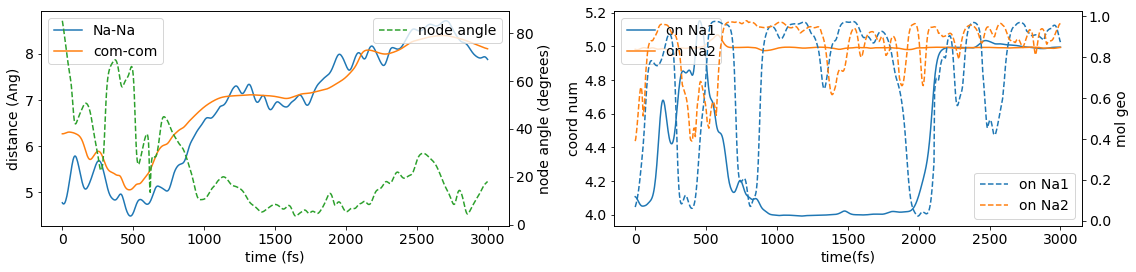

In [21]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(bond_dist[:,0], bond_dist[:,1], label='Na-Na')
plt.plot(com_dist[:,0], com_dist[:,1], label='com-com')
plt.legend(loc=2)
plt.ylabel('distance (Ang)')
#plt.xlim([0,3000])
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(node_angle[:,0], node_angle[:,1], 'C2--', label='node angle')
plt.ylabel('node angle (degrees)')
plt.legend(loc=1)
# plt.ylim([0,90])

plt.subplot(1,2,2)
plt.plot(coord_num[:,0], coord_num[:,1], label='on Na1')
plt.plot(coord_num[:,0], coord_num[:,2], label='on Na2')
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time(fs)')

plt.twinx()
plt.plot(mol_geo[:,0], mol_geo[:,1], 'C0--', label='on Na1')
plt.plot(mol_geo[:,0], mol_geo[:,2], 'C1--', label='on Na2')
plt.legend(loc=4)
plt.ylabel('mol geo')

plt.tight_layout()

For (5,5)

In [3]:
my_dir = '/u/project/schwartz/kmei94/Na2/dynamic/condensed/55init/1/'
(t0, t, dt) = (0, 3000, 4)
t_frames = np.arange(t0, t+dt, dt)

coord_num = np.zeros([len(t_frames), 3])
node_angle = np.zeros([len(t_frames), 2])
com_dist = np.zeros([len(t_frames), 2])
mol_geo = np.zeros([len(t_frames), 3])

bond_dist = np.loadtxt(my_dir+'/bondumb2.out')[int(t0/4):int(t/4+1):int(dt/4)]
dipole = np.loadtxt(my_dir+'/out.dip')[int(t0/4):int(t/4+1):int(dt/4),3:6]
for i in range(len(t_frames)):
    r_Na, r_THF = thf_lib.readPos(my_dir+'/out.conf', t_frames[i])

    coord_num[i,1:] = thf_lib.calcCoordNum(r_Na, r_THF, r_cutoff=3.65, kappa=0.2, n_solu=2)
    node_angle[i,1] = thf_lib.calcNodeAngle(r_Na, dipole[i,:])
    # calculating molecular geometry
    coord_indices = thf_lib.findCoordIndex(r_Na, r_THF)[0]
    na1_indices = 5*np.array([n for n in coord_indices[0] if n >= 0])
    na2_indices = 5*np.array([n for n in coord_indices[1] if n >= 0])
    mol_geo[i,1] = thf_lib.calcMolGeo(r_Na[0], r_THF[na1_indices])
    mol_geo[i,2] = thf_lib.calcMolGeo(r_Na[1], r_THF[na2_indices])
r_com = thf_lib.calcCOMPosConf(my_dir, t0, t, dt)
com_dist[:,1] = np.array([lib.dist(r_com[t,0], r_com[t,1]) for t in range(len(t_frames))])

coord_num[:,0] = t_frames
node_angle[:,0] = t_frames
com_dist[:,0] = t_frames
mol_geo[:,0] = t_frames

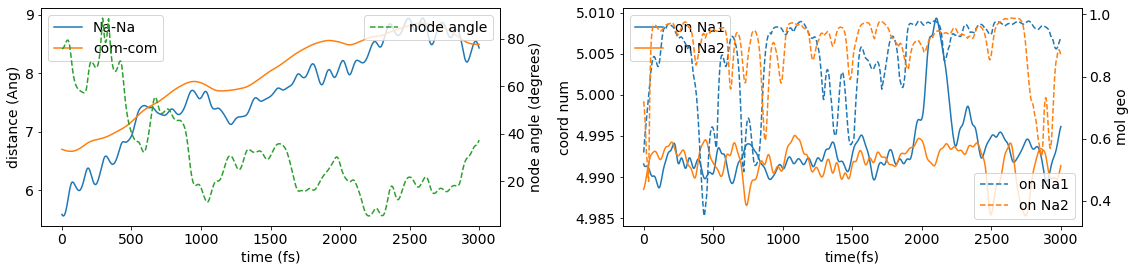

In [4]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(bond_dist[:,0], bond_dist[:,1], label='Na-Na')
plt.plot(com_dist[:,0], com_dist[:,1], label='com-com')
plt.legend(loc=2)
plt.ylabel('distance (Ang)')
#plt.xlim([0,3000])
plt.xlabel('time (fs)')

plt.twinx()
plt.plot(node_angle[:,0], node_angle[:,1], 'C2--', label='node angle')
plt.ylabel('node angle (degrees)')
plt.legend(loc=1)
# plt.ylim([0,90])

plt.subplot(1,2,2)
plt.plot(coord_num[:,0], coord_num[:,1], label='on Na1')
plt.plot(coord_num[:,0], coord_num[:,2], label='on Na2')
plt.legend(loc=2)
plt.ylabel('coord num')
plt.xlabel('time(fs)')

plt.twinx()
plt.plot(mol_geo[:,0], mol_geo[:,1], 'C0--', label='on Na1')
plt.plot(mol_geo[:,0], mol_geo[:,2], 'C1--', label='on Na2')
plt.legend(loc=4)
plt.ylabel('mol geo')

plt.tight_layout()